In [3]:
import pandas as pd
import sqlite3

In [4]:
connect_db = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
query = 'PRAGMA table_info(pageviews);'
pd.io.sql.read_sql(query, connect_db)

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,uid,TEXT,0,None,0
2,2,datetime,TIMESTAMP,0,None,0


In [5]:
query = '''
        select datetime from pageviews where uid like 'user_%'
        '''
df = pd.io.sql.read_sql(query, connect_db, parse_dates=['datetime'])
df

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [6]:
ds = df.groupby(df.datetime.dt.date).count()
ds.head()

,datetime
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


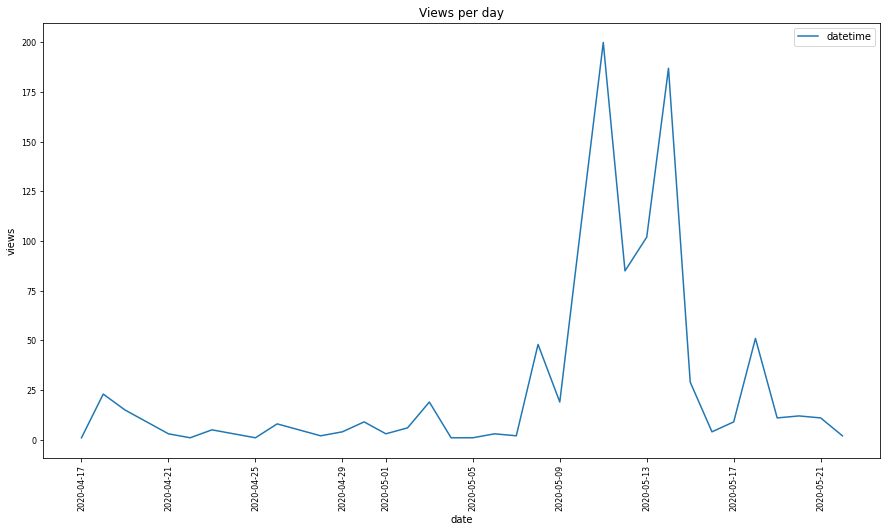

In [7]:
ds.plot(figsize= (15,8), title = 'Views per day', fontsize=8, xlabel = 'date', ylabel = 'views', rot = 90)


In [8]:
connect_db.close()